In [1]:
# Data collection
import pandas_datareader as pdr
df = pdr.get_data_tiingo ('AAPL',api_key = '9cc1ec29a5ac83b9470b1faf03a1825e455f1bb6')

In [2]:
# converting the collected data to a csv file
df.to_csv ('AAPL.csv')

In [3]:
import pandas as pd

In [4]:
# Reading the CSV file
df = pd.read_csv ('AAPL.csv')

In [5]:
df.shape 

(1257, 14)

In [6]:
df.tail(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-09-13 00:00:00+00:00,149.55,151.42,148.750,150.63,102404329,149.55,151.42,148.750,150.63,102404329,0.0,1.0
1253,AAPL,2021-09-14 00:00:00+00:00,148.12,151.07,146.910,150.35,109296295,148.12,151.07,146.910,150.35,109296295,0.0,1.0
1254,AAPL,2021-09-15 00:00:00+00:00,149.03,149.44,146.370,148.56,83281315,149.03,149.44,146.370,148.56,83281315,0.0,1.0
1255,AAPL,2021-09-16 00:00:00+00:00,148.79,148.97,147.221,148.44,68034149,148.79,148.97,147.221,148.44,68034149,0.0,1.0
1256,AAPL,2021-09-17 00:00:00+00:00,146.06,148.82,145.760,148.82,129868824,146.06,148.82,145.760,148.82,129868824,0.0,1.0


In [7]:
# Taking in the close column to do the stock prediction
df2 = df.reset_index () ['close']

In [8]:
df2.size

1257

In [9]:
df2

0       113.55
1       114.62
2       112.71
3       112.88
4       113.09
         ...  
1252    149.55
1253    148.12
1254    149.03
1255    148.79
1256    146.06
Name: close, Length: 1257, dtype: float64

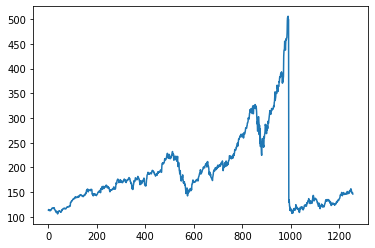

In [10]:
# Plotting the df2 dataset, the 'close' column
import matplotlib.pyplot as plt
plt.plot (df2)

In [11]:
df2

0       113.55
1       114.62
2       112.71
3       112.88
4       113.09
         ...  
1252    149.55
1253    148.12
1254    149.03
1255    148.79
1256    146.06
Name: close, Length: 1257, dtype: float64

#### Data Preprocessing

In [12]:
# LSTM are sensitive to the scale of the data.
# NumPy is used to transform the data into an array.
import numpy as np

In [13]:
# We apply the MinMax scaler to format the scale of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range = (0,1))
df2 = scaler.fit_transform (np.array(df2).reshape(-1,1))

In [14]:
df2.shape

(1257, 1)

In [15]:
df2

array([[0.0195814 ],
       [0.02225386],
       [0.01748339],
       ...,
       [0.10819721],
       [0.10759778],
       [0.10077926]])

In [16]:
# Spliting our data set into training and test data
training_size =  int(len(df2) * 0.65)
test_size = len(df2) -training_size
train_data,test_data = df2 [0:training_size,:],df2 [training_size:len(df2),:1]
test_data

array([[0.43536141],
       [0.43391278],
       [0.44530196],
       [0.44597632],
       [0.46006294],
       [0.4597882 ],
       [0.46408412],
       [0.46940407],
       [0.48613817],
       [0.4788451 ],
       [0.48476447],
       [0.48124282],
       [0.49323143],
       [0.50931615],
       [0.51106449],
       [0.52762376],
       [0.51693391],
       [0.51358709],
       [0.52332784],
       [0.53204456],
       [0.52664968],
       [0.529472  ],
       [0.53329337],
       [0.53099555],
       [0.50761776],
       [0.52944703],
       [0.54605625],
       [0.54488236],
       [0.50901643],
       [0.50689345],
       [0.53234427],
       [0.5388381 ],
       [0.54822918],
       [0.53529147],
       [0.53908787],
       [0.53424247],
       [0.55319946],
       [0.54737999],
       [0.5475798 ],
       [0.53271892],
       [0.54425795],
       [0.53596583],
       [0.51785803],
       [0.48071832],
       [0.45549228],
       [0.46690644],
       [0.41912683],
       [0.418

In [17]:
training_size,test_size

(817, 440)

In [18]:
# Converting our array values into a Matrix
def create_dataset (dataset, time_step = 1):
    data_X,data_y = [],[]
    for i in range (len (dataset)-time_step -1):
        a = dataset [i:(i + time_step),0]
        data_X.append(a)
        data_y.append (dataset [i + time_step,0])
    return np.array(data_X),np.array(data_y)

In [19]:
# Reshaping the data in formats of timesteps
# reshaping into X=t, t+1, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset (train_data,time_step)
X_test,y_test = create_dataset (test_data,time_step )

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [22]:
# Reshaping the input to be in 3D [samples, timestep, features] as required in the LSTM
X_train = X_train.reshape (X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape (X_test.shape[0],X_test.shape[1],1)

## Creating the Stacked LSTM model


```
# This is formatted as code
```



In [23]:
# The LSTM uses sequential layers for the models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
# stacking the layers
model = Sequential ()
model.add (LSTM(50, return_sequences = True,input_shape = (100,1)))
model.add (LSTM(50, return_sequences = True))
model.add (LSTM(50))
model.add (Dense (1))
model.compile (loss='mean_squared_error',optimizer = 'adam')


In [25]:
model.summary ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 300ms/step - loss: 0.0108 - val_loss: 0.0312
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0024 - val_loss: 0.0233
Epoch 3/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0012 - val_loss: 0.0202
Epoch 4/100
12/12 [==============================] - 2s 187ms/step - loss: 6.1653e-04 - val_loss: 0.0196
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 4.6891e-04 - val_loss: 0.0222
Epoch 6/100
12/12 [==============================] - 2s 186ms/step - loss: 4.5395e-04 - val_loss: 0.0217
Epoch 7/100
12/12 [==============================] - 2s 191ms/step - loss: 4.2836e-04 - val_loss: 0.0203
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 4.1859e-04 - val_loss: 0.0201
Epoch 9/100
12/12 [==============================] - 2s 188ms/step - loss: 4.1966e-04 - val_loss: 0.0206
Epoch 10/100
12/12 [==============================] - 2s 189ms/step

In [27]:
train_predict =  model.predict (X_train)
test_predict =  model.predict (X_test)

In [28]:
train_predict = scaler.inverse_transform (train_predict)
test_predict = scaler.inverse_transform (test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt (mean_squared_error(y_train,train_predict))


185.9480573455371

In [30]:
math.sqrt (mean_squared_error (y_test,test_predict))

219.98116069503595

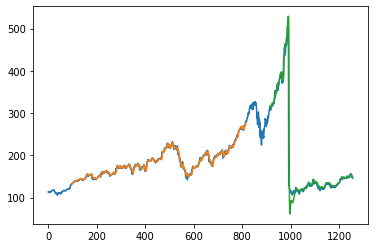

In [31]:
look_back = 100
trainPredictPlot = np.empty_like (df2)
trainPredictPlot [:,:] = np.nan
trainPredictPlot [look_back:len(train_predict) + (look_back) , :] = train_predict

testPredictPlot = np.empty_like (df2)
testPredictPlot [:,:] = np.nan
testPredictPlot [len(train_predict) + (look_back * 2) + 1:len(df2) -1, :] = test_predict

plt.plot (scaler.inverse_transform(df2))
plt.plot (trainPredictPlot)
plt.plot (testPredictPlot)
plt.show ()

In [32]:
len(test_data)

440

In [33]:
X_input = test_data[340:].reshape (1,-1)


In [34]:
X_input.shape

(1, 100)

In [35]:
temp_input = list (X_input)
temp_input = temp_input[0].tolist ()


In [36]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
  if(len(temp_input) > 100):
    X_input = array (temp_input[1:])
    print(" {} day input {}".format(i,X_input))
    X_input = X_input.reshape (1,-1)
    X_input = X_input.reshape ((1,n_steps,1))
    yhat = model.predict (X_input,verbose=0)
    print(" {} day input {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist ())
    temp_input = temp_input [1:]
    lst_output.extend(yhat.tolist ())
    i = i + 1
  else:
    X_input = X_input.reshape (1,n_steps,1)
    yhat = model.predict (X_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist ())
    print(len(temp_input))
    lst_output.extend(yhat.tolist ())
    i = i+1
  print(lst_output)


[0.10707733]
101
[[0.10707733035087585]]
 1 day input [0.06935911 0.0643139  0.06701134 0.05529747 0.05592187 0.06001798
 0.06119187 0.05279984 0.05045207 0.04260952 0.0481043  0.05429842
 0.05135122 0.04780459 0.04740497 0.05394875 0.04925321 0.05342425
 0.05292472 0.05279984 0.04887857 0.04720516 0.04638094 0.04832909
 0.04453269 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516
 0.05404865 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627
 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602
 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.1071232

In [37]:
day_new =  np.arange (1,101)
day_pred = np.arange (101,131)

In [38]:
len(df2)

1257

In [39]:
df3 = df2.tolist ()
df3.extend (lst_output)

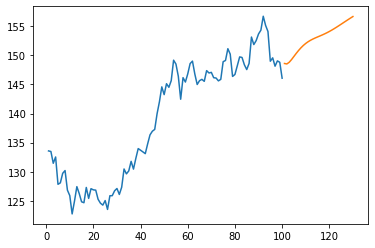

In [40]:
plt.plot(day_new,scaler.inverse_transform(df2[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))